# Week 7 - Group Assignment with Function and Loop

Carolyn Chu and Leslie Velasquez

This notebook focuses on creating a function and loop relevant to our datasets. It uses the parks and council districts data from LA City's Open Data Portal.

### Import Libraries and Data

In [1]:
# import libraries
import pandas as pd                      # for data wrangling
import geopandas as gpd                  # for analyzing spatial data
import contextily as ctx                 # for base maps
import matplotlib.pyplot as plt          # for plotting data

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### Import Parks and City Council Data

In [2]:
#pull the parks data directly from the website link
parks = gpd.read_file("https://data.lacity.org/api/geospatial/rwq7-yhp5?method=export&format=GeoJSON")
councildistricts = gpd.read_file('data/Council Districts.geojson')

In [3]:
# look at columns at datatypes of the parks file
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        561 non-null    object  
 1   shape_area  561 non-null    object  
 2   objectid    561 non-null    object  
 3   park_id     561 non-null    object  
 4   name_alpha  561 non-null    object  
 5   shape_leng  561 non-null    object  
 6   area_acres  561 non-null    object  
 7   issubpark   561 non-null    object  
 8   region      561 non-null    object  
 9   address     561 non-null    object  
 10  name_publi  330 non-null    object  
 11  park_class  561 non-null    object  
 12  cd_real     561 non-null    object  
 13  geometry    561 non-null    geometry
dtypes: geometry(1), object(13)
memory usage: 61.5+ KB


In [4]:
# look at columns and datatypes of the council districts file
councildistricts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   dist_name  15 non-null     object  
 1   district   15 non-null     object  
 2   name       15 non-null     object  
 3   objectid   15 non-null     object  
 4   geometry   15 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 728.0+ bytes


In [5]:
# look at the full data
councildistricts

dist_name district                     name objectid  \
0           1 - Gilbert Cedillo        1          Gilbert Cedillo        1   
1            2 - Paul Krekorian        2           Paul Krekorian        2   
2           3 - Bob Blumenfield        3          Bob Blumenfield        3   
3              4 - Nithya Raman        4             Nithya Raman        4   
4               5 - Paul Koretz        5              Paul Koretz        5   
5             6 - Nury Martinez        6            Nury Martinez        6   
6          7 - Monica Rodriguez        7         Monica Rodriguez        7   
7   8 - Marqueece Harris-Dawson        8  Marqueece Harris-Dawson        8   
8       9 - Curren D. Price Jr.        9      Curren D. Price Jr.        9   
9    10 - Office of District 10       10    Office of District 10       10   
10              11 - Mike Bonin       11               Mike Bonin       11   
11                12 - John Lee       12                 John Lee       12   
12         13 - Mitch O'Farrell       13          Mitch O'Farrell       13   
13           14 - Kevin de León       14            Kevin de León       14   
14            15 - Joe Buscaino       15             Joe Buscaino       15   

                                             geometry  
0   MULTIPOLYGON (((-118.26869 34.04671, -118.2688...  
1   MULTIPOLYGON (((-118.33732 34.22103, -118.3345...  
2   MULTIPOLYGON (((-118.54919 34.22053, -118.5491...  
3   MULTIPOLYGON (((-118.51860 34.20840, -118.5185...  
4   MULTIPOLYGON (((-118.39158 34.11243, -118.3923...  
5   MULTIPOLYGON (((-118.36533 34.22870, -118.3618...  
6   MULTIPOLYGON (((-118.33732 34.22103, -118.3395...  
7   MULTIPOLYGON (((-118.30027 34.03716, -118.2988...  
8   MULTIPOLYGON (((-118.23971 34.01480, -118.2397...  
9   MULTIPOLYGON (((-118.28789 34.06897, -118.2878...  
10  MULTIPOLYGON (((-118.48052 34.12985, -118.4805...  
11  MULTIPOLYGON (((-118.47299 34.23194, -118.4730...  
12  MULTIPOLYGON (((-118.27898 34.15320, -118.2755...  
13  MULTIPOLYGON (((-118.23971 34.01480, -118.2397...  
14  MULTIPOLYGON (((-118.29167 33.92870, -118.2869...

In [6]:
#reproject both datasets so I can add basemaps
parks = parks.to_crs(epsg=3857)
councildistricts = councildistricts.to_crs (epsg=3857)

### Create the Function

In [7]:
# function to create a council district map
def cd_parkmap(district = '1', column = 'cd_real'):
    # this cd
    this_cd = councildistricts[councildistricts['district']==district]
    
    # spatial join to get parks
    tracts = gpd.sjoin(parks,this_cd)

    # plot it
    fig,ax = plt.subplots(figsize=(10,10))

    # map
    tracts.plot(ax=ax,
                column=column,
                legend=True)

    ax.axis('off')
    ax.set_title('Council District ' + district + ' Parks' + '\n(' + 'with neighboring Council Districts Parks' + ')', fontsize=14)
    
    #add basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

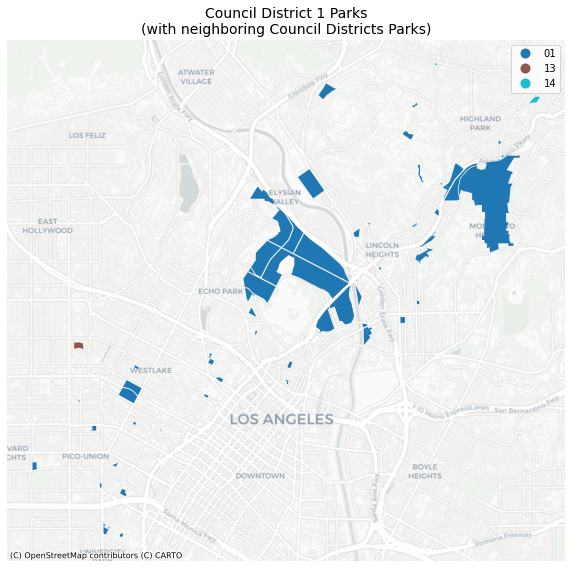

In [8]:
#check that it works for CD 1
cd_parkmap()

### Loop It

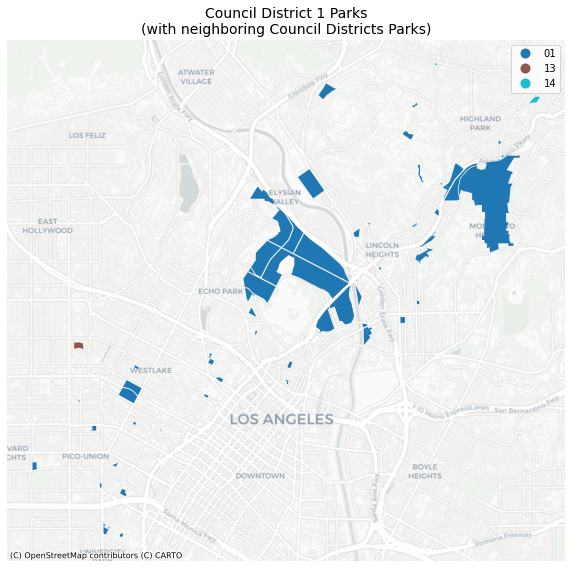

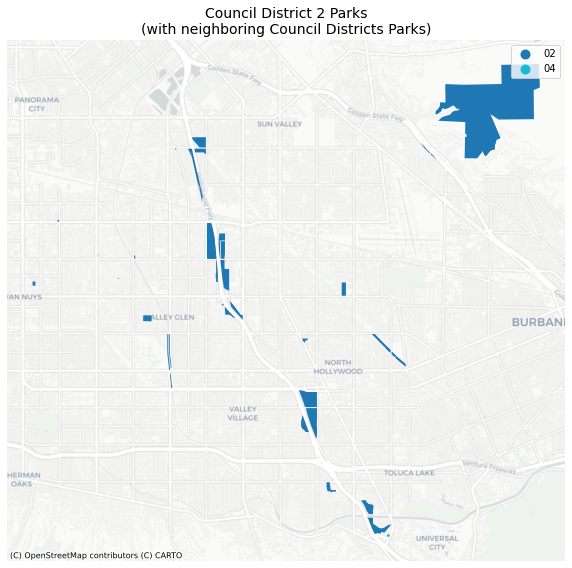

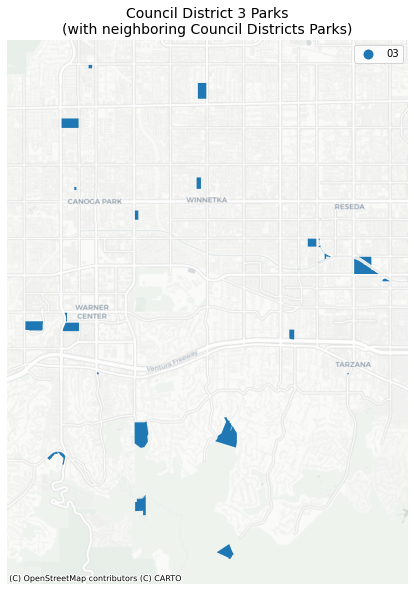

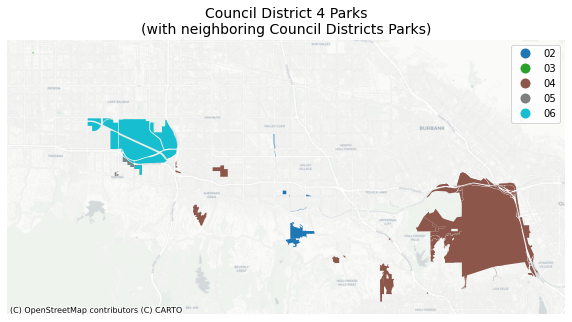

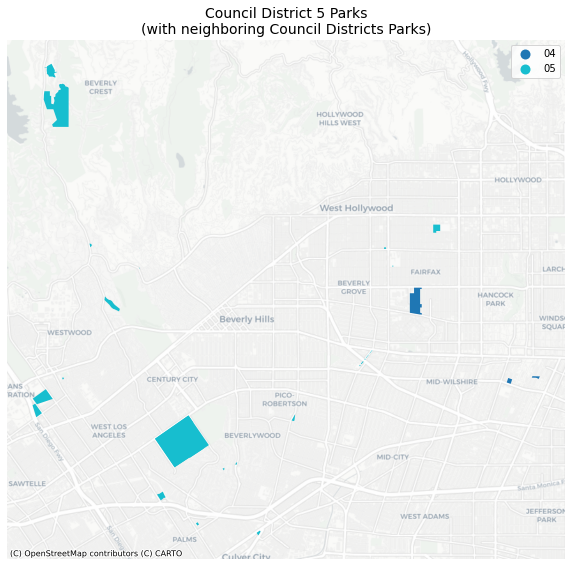

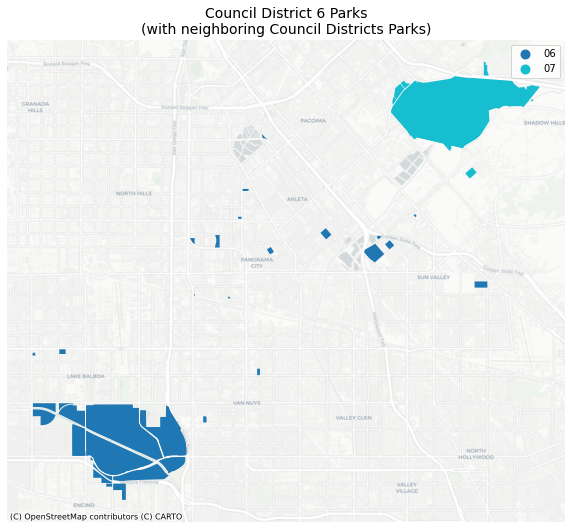

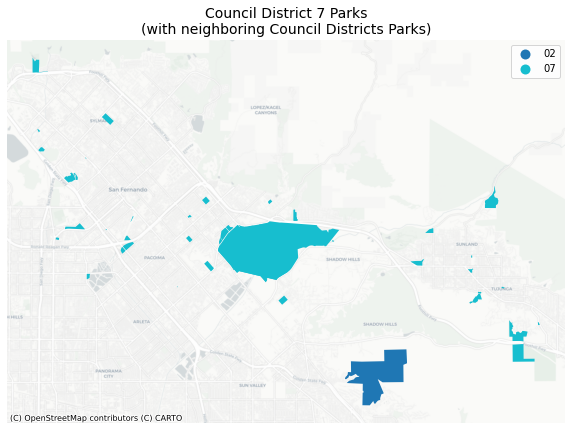

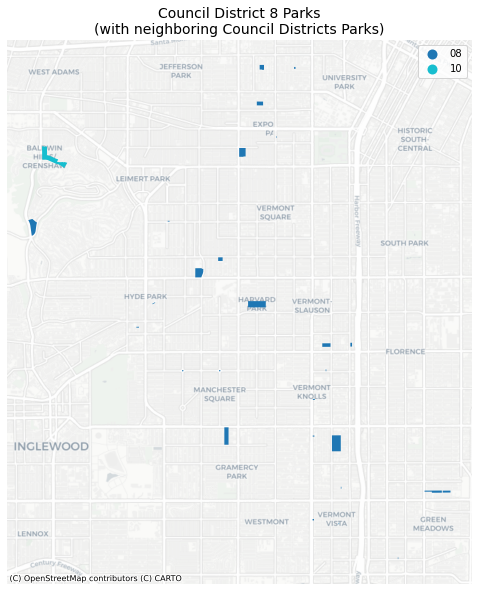

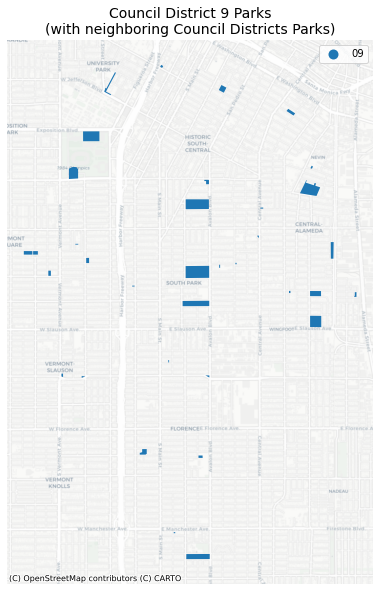

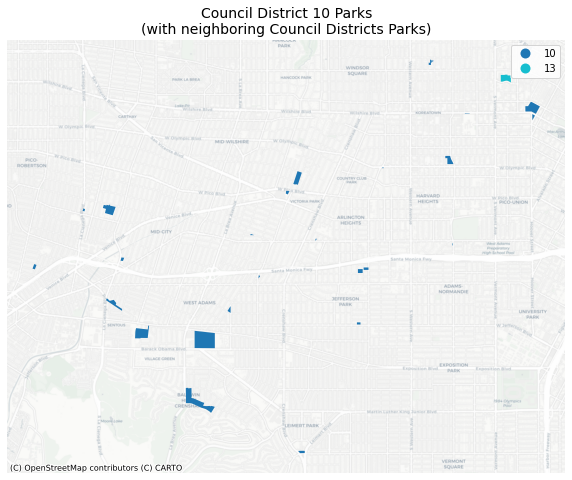

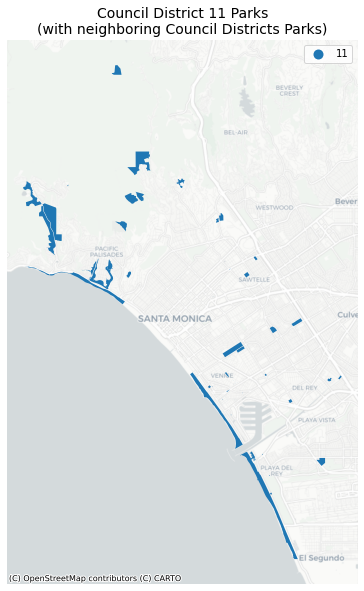

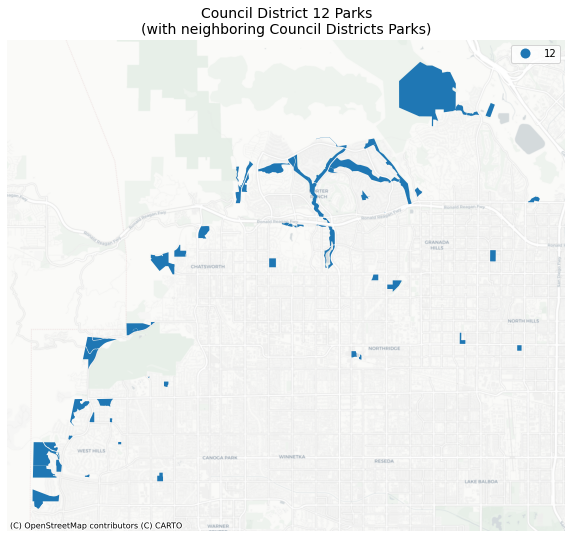

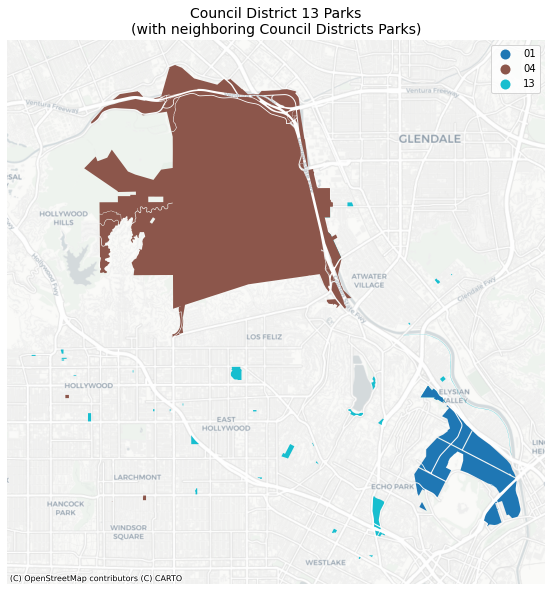

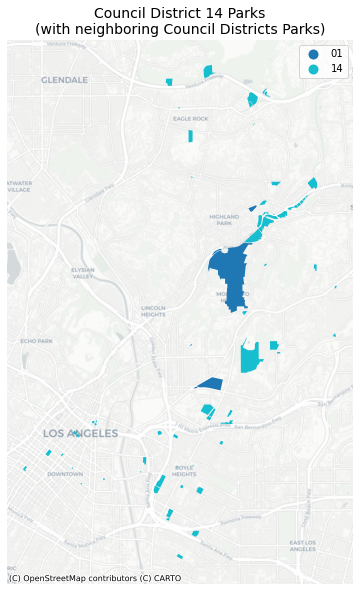

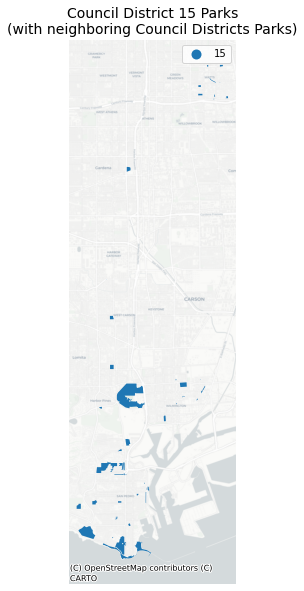

In [9]:
#loop through the CDs
for index, row in councildistricts.iterrows():
    cd_parkmap(district = row['district'])

### Reflections on the Process

The maps above are useful to understand the scope of parks that each council district oversees and the park disparities across districts. The map for Council District 13, for example, shows how tiny the parks are in that district in comparison to its two neighboring districts. Or CD 15 may have many parks, but they are very small in comparison to the parks in other CDs.

We struggled quite a bit with creating a function and loop for our data. (There are other notebooks with lots of broken code and codes with errors that are not shown here in this notebook.) 

For the future, I'm curious to know if I could have produced these maps without having to spatially join the council distritc geojson file since the parks data already contains a column for council districts. I'm also interested in looking at parks per neighborhood using a geojson file [from LA Times](https://maps.latimes.com/about/index.html).